# Introduction

## What is Singular Value Decomposition?

Singular Value Decomposition (SVD), is a method of decomposing any matrix into three different matrices.



*   U is an m x m orthogonal matrix: its columns are called the left singular vectors of A
*   Sigma is aan m x n diagonal matrix. Where sigma_i are called the singular values of A
* $V^T$ is an n x n transposed orthogonal matrix. The columns of V are called the right-singular vectors of A.

U and V correspond to rotations while Sigma corresponds with scaling. Thus sigma_i with greater values are most impactful. SVD can be reformulated as $\sum_{i=1}^r\sigma_i u_i v^T_i$ where $\sigma_i$ is decreasing as i increases. This formulation shows us that we can approximate A by including only a subset of the terms of the sum. If we only want to include the 5 most impactful terms to approximate A, then we simply take the sum from i=1 to i=5.







## How does SVD apply to image compression

A black and white image that is m x n pixels can be represented as an m x n matrix where each element ranges from 0 to 255 with 0 being black and 255 being white. Because the image can be represented by a matrix, we can perform SVD on that matrix. Just as selecting the most impactful \sigma values will help approximate matrix, selecting the most impactful \sigma values of the matrix representaiton of the image will allow us to approximate the image.

# Code

In [10]:
# !pip install opencv-python
# !pip install PIL


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
from PIL import Image

def svd_compression(image_path, ranks=[1, 3, 5, 10, 15, 20, 512]):
    # Read the image in grayscale
    img = Image.open(image_path).convert('L')
    img = np.array(img)

    # Perform SVD decomposition
    U, S, Vt = np.linalg.svd(img, full_matrices=False)

    # Print number of singular values
    print(f"Total number of singular values in full decomposition: {len(S)}")

    # Display original image
    plt.figure(figsize=(10, 5))
    plt.subplot(2, len(ranks)//2 + 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    # Reconstruct image with different numbers of singular values
    for i, r in enumerate(ranks):
        compressed_img = np.dot(U[:, :r], np.dot(np.diag(S[:r]), Vt[:r, :]))

        plt.subplot(2, len(ranks)//2 + 1, i+2)
        plt.imshow(compressed_img, cmap='gray')
        plt.title(f"Rank {r}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


Total number of singular values in full decomposition: 512


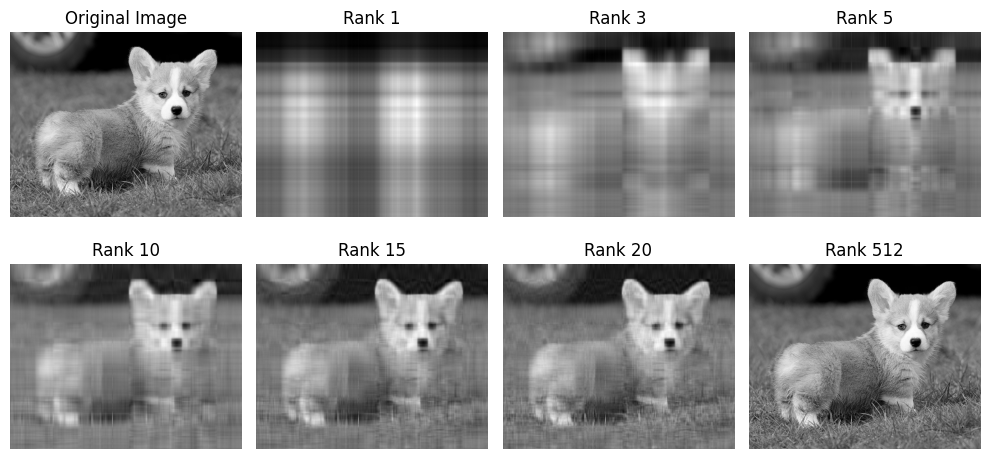

In [14]:
svd_compression(r"C:\Users\pjs5\Desktop\corgi picture.jpg")

The images above show the outputs of performing SVD image compression when utilziing different number of $\sigma$ terms. The rank 1 image is very rough and there is very lttle detail. But, at just rank 5, we start seeing some vague outlines of the leg of the dog. At rank 10, it is very clear that the image is of a corgi and at rank 20, the image just appears as a low resolution corgi image.

The amout of new information added from rank 1 to rank 10 is great as the addition of 9 more terms allows for easy identification f the image. With each additional term, the improvement seems to diminish, but the image does appear to get better as it approaches the full resolution non-compressed image.